**Task 01 : TITANIC SURVIVAL PREDICTION**

Description: I have used the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. The dataset used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

**FLOW ANALYSIS:**

* Importing Libraries

* Data loading

* Data Pre-Processing

    *   Replacing missing values
    *   Dropping unnecessary columns
    *   Creating new column (Feature Engineering)
    *   Encoding categorical columns
    *   Scaling numeric columns

* Exploratory Data analysis (EDA)

* Spliting training and test data

* Model training -Logistic Regression

* Model Evaluation - Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Data Loading
data = pd.read_csv('/content/drive/MyDrive/CodSoft/tested.csv')

In [4]:
# Displaying first 5 rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Displaying information regarding datatype, null values of every column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# It will calculate and display count, mean, std, min, max, 25%, 50% and 75% of numeric columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# Checking for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Filling null values in Age using mean
mean_age = data['Age'].mean()

data['Age'].fillna(mean_age, inplace=True)

In [9]:
# Filling null values in Fare using mean

mean_fare = data['Fare'].mean()

data['Fare'].fillna(mean_fare, inplace=True)

In [10]:
# Encoding categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [11]:
# Feature engineering - creating a family size column
data['family_size'] = data['SibSp'] + data['Parch']

In [12]:
# Dropping unnecessary columns
data = data.drop(['PassengerId','Name','Cabin','Ticket',], axis =1)

In [13]:
# Creating a LabelEncoder instance
label_encoder = LabelEncoder()

# Encoding the 'embarked' column
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

##**Data Visualization**

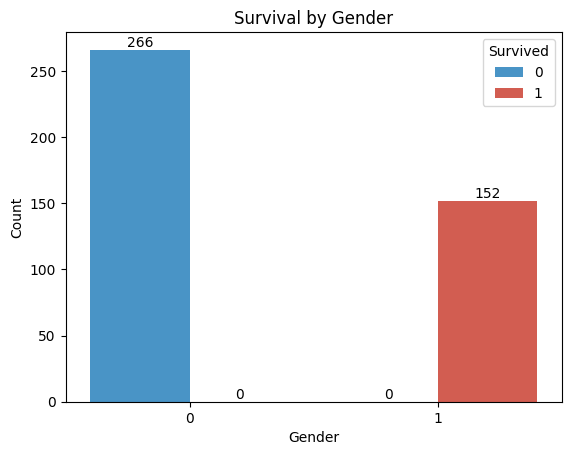

In [14]:
sns.set_palette("pastel")

# Survival by gender
ax = sns.countplot(data=data, x='Sex', hue='Survived', palette=["#3498db", "#e74c3c"])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival by Gender')

# Add counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height, f'{int(height)}', ha='center', va='bottom')

plt.show()

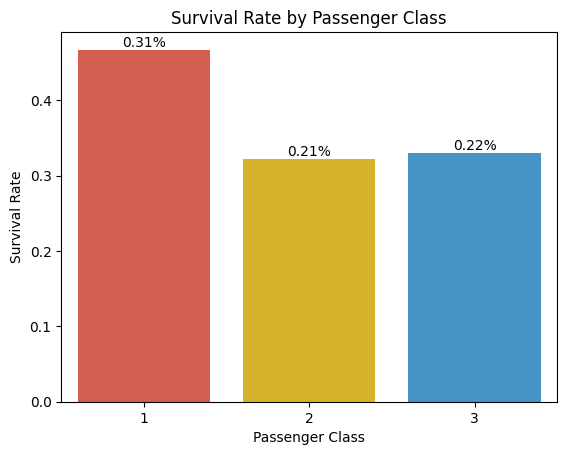

In [15]:
custom_palette = ['#e74c3c', '#f1c40f', '#3498db']

# Survival Rate by Passenger Class
sns.set_palette(custom_palette)
ax = sns.barplot(data=data, x='Pclass', y='Survived', errorbar=None)

plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')

total_height = sum(data['Survived'])
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total_height:.2f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom')

plt.show()



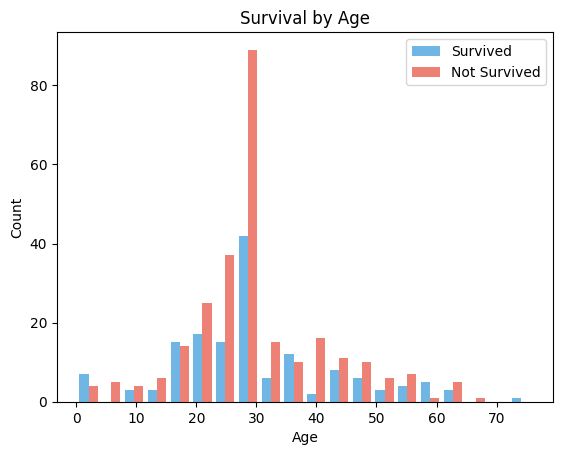

In [16]:
colors = ['#3498db', '#e74c3c']

# Creating the histogram for Survival by Age
plt.hist([data[data['Survived'] == 1]['Age'], data[data['Survived'] == 0]['Age']],
         bins=20, label=['Survived', 'Not Survived'], alpha=0.7, color=colors)

plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Survival by Age')
plt.show()


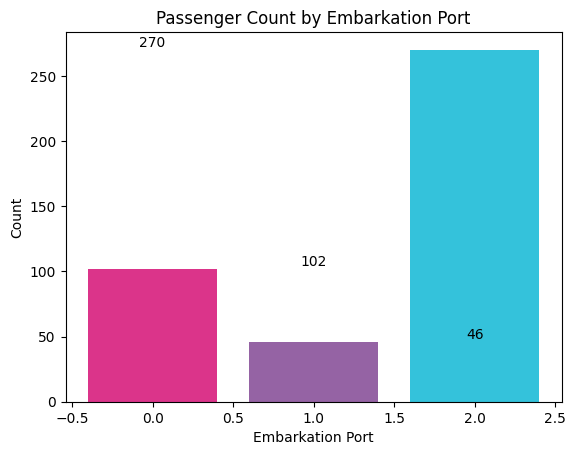

In [17]:
embarked_counts = data['Embarked'].value_counts()

colors = ['#34c2db', '#db348a', '#9563a4']

# Creating the barplot
plt.bar(embarked_counts.index, embarked_counts.values, color=colors)

plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.title('Passenger Count by Embarkation Port')

for i, count in enumerate(embarked_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

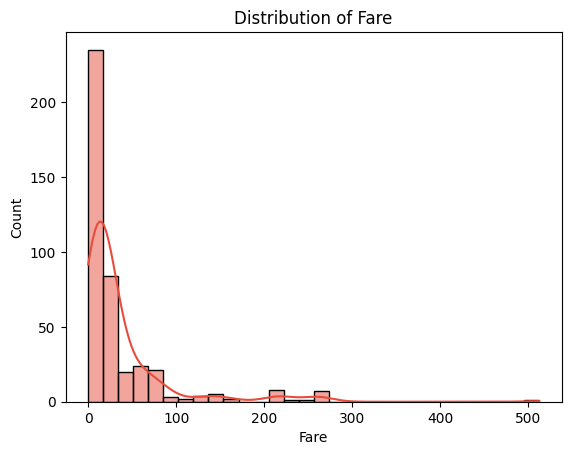

In [18]:
# Histplot for the Distribution of Fare
sns.histplot(data=data, x='Fare', bins=30, kde=True)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare')
plt.show()


<ipython-input-19-303103d80195>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='family_size', y='Survived', ci=None)


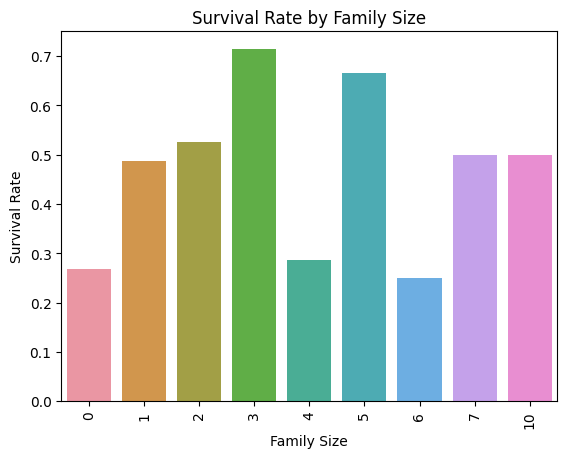

In [19]:
# Barplot for Survival Rate by Family Size
sns.barplot(data=data, x='family_size', y='Survived', ci=None)
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.xticks(rotation=90)
plt.show()


In [20]:
# As we have created a new column "Family Size". So, will drop the previous one's.
data.drop(columns=['SibSp', 'Parch', 'Embarked'], inplace=True)

In [21]:
data.head()

,Survived,Pclass,Sex,Age,Fare,family_size
0,0,3,0,34.5,7.8292,0
1,1,3,1,47.0,7.0000,1
2,0,2,0,62.0,9.6875,0
3,0,3,0,27.0,8.6625,0
4,1,3,1,22.0,12.2875,2


In [22]:
# Now, Data is cleaned
data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
family_size    0
dtype: int64

In [23]:
# Data Splitting
X = data.drop(["Survived"] , axis = 1)
y = data['Survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Applying MinMax Scaling
scaling = MinMaxScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.fit_transform(X_test)

In [25]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [26]:
y_pred = model.predict(X_test)

# Calculating accuracy and its percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Generating the classification report
report = classification_report(y_test, y_pred)

# Displaying accuracy in percentage
print(f"Accuracy: {accuracy:.2f}%")
print(report)

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



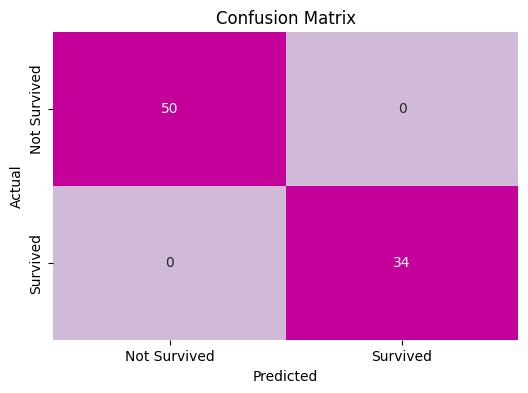

In [27]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

colors = ['#d0bad7', '#c5019c']

cmap = sns.color_palette(colors)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
